In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import seaborn as sns
import re
import random as rd
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import autokeras as ak
from sklearn.model_selection import KFold

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
df = pd.read_excel('./rotulação/TweetsPolitical01 OK OK.xlsx')
df2 = pd.read_excel('./rotulação/TweetsPolitical02 OK OK.xlsx')
df3 = pd.read_excel('./rotulação/TweetsPolitical03 OK OK.xlsx')
df4 = pd.read_excel('./rotulação/TweetsPolitical04 OK OK.xlsx')
df5 = pd.read_excel('./rotulação/TweetsPolitical05 OK OK.xlsx')
df6 = pd.read_excel('./rotulação/TweetsPolitical06 OK OK.xlsx')
df7 = pd.read_excel('./rotulação/TweetsPolitical07 OK OK.xlsx')
df8 = pd.read_excel('./rotulação/TweetsPolitical08 OK OK.xlsx')
df9 = pd.read_excel('./rotulação/TweetsPolitical09 OK OK.xlsx')
df10 = pd.read_excel('./rotulação/TweetsPolitical10 OK OK.xlsx')
df11 = pd.read_excel('./rotulação/TweetsPolitical11 OK OK.xlsx')
df12 = pd.read_excel('./rotulação/TweetsPolitical12 OK OK.xlsx')
df13 = pd.read_excel('./rotulação/TweetsPolitical13 OK OK.xlsx')
df14 = pd.read_excel('./rotulação/TweetsPolitical14 OK OK.xlsx')
df15 = pd.read_excel('./rotulação/TweetsPolitical15 OK OK.xlsx')

lista = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

df_all = pd.concat(lista)
df_all.shape

(12670, 2)

In [3]:
df_all.head()

,Tweet,Polaridade
0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0


In [4]:
df_all.isnull().sum()

Tweet         2
Polaridade    2
dtype: int64

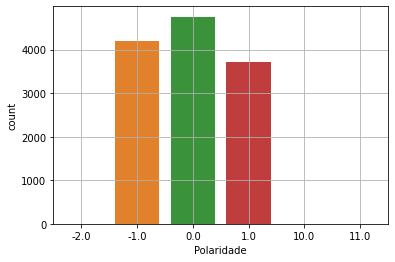

In [5]:
df_all = df_all.dropna()

sns.countplot(data=df_all, x='Polaridade')
plt.grid()

In [6]:
df_all = df_all.reset_index()
df_all

,index,Tweet,Polaridade
0,0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...,...
12663,78,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,79,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,80,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,81,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [7]:
df_all = df_all.drop(columns=['index'])
df_all.drop(df_all[df_all['Polaridade'] == 11].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == -2].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == 10].index, inplace=True)

df_all['Polaridade'].unique()

array([ 0.,  1., -1.])

In [8]:
Tweet = df_all['Tweet']
polarity = np.asarray(df_all['Polaridade'])

np.unique(polarity)

array([-1.,  0.,  1.])

In [9]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(12665, 24464)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)
clf = MultinomialNB()
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)

print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

        -1.0       0.55      0.83      0.66      1271
         0.0       0.68      0.62      0.65      1424
         1.0       0.62      0.33      0.43      1105

    accuracy                           0.61      3800
   macro avg       0.62      0.60      0.58      3800
weighted avg       0.62      0.61      0.59      3800



In [11]:
kf = KFold(n_splits=10)
clf = MultinomialNB()
lista = []
for train_index, test_index in kf.split(X_train_transform):
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lista.append(clf.score(X_test, y_test))
    
    print(clf.score(X_test, y_test))
    
print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}  ')

0.5445935280189423
0.5698500394632992
0.6479873717442778
0.6535122336227308
0.430939226519337
0.5742496050552922
0.5876777251184834
0.5932069510268563
0.5789889415481833
0.6058451816745656
 Média: 0.5786850803791967 	 Std: 0.05875391811268977  


## SVM

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)
clf = SVC().fit(X_train, Y_train) 
predicted = clf.predict(X_test)

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.63      0.71      0.67      1292
         0.0       0.65      0.73      0.69      1408
         1.0       0.64      0.43      0.51      1100

    accuracy                           0.64      3800
   macro avg       0.64      0.62      0.62      3800
weighted avg       0.64      0.64      0.63      3800



In [13]:
kf = KFold(n_splits=10)
clf = SVC()
lista = []
for train_index, test_index in kf.split(X_train_transform):
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lista.append(clf.score(X_test, y_test))
    
    print(clf.score(X_test, y_test))
    
print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}  ')

0.6211523283346487
0.6353591160220995
0.664561957379637
0.6937647987371744
0.48066298342541436
0.5774091627172195
0.5932069510268563
0.584518167456556
0.5868878357030016
0.6058451816745656
 Média: 0.6043368482477173 	 Std: 0.054509894958797704  


## RL

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)
clf = LogisticRegression(max_iter=1000).fit(X_train, Y_train) 
predicted = clf.predict(X_test)

print(classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.65      0.69      0.67      1263
         0.0       0.65      0.73      0.69      1428
         1.0       0.63      0.49      0.55      1109

    accuracy                           0.65      3800
   macro avg       0.64      0.64      0.64      3800
weighted avg       0.65      0.65      0.64      3800



In [15]:
kf = KFold(n_splits=10)
clf = LogisticRegression(max_iter=1000)
lista = []
for train_index, test_index in kf.split(X_train_transform):
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    lista.append(clf.score(X_test, y_test))
    
    print(clf.score(X_test, y_test))
    
print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}  ')

0.5990528808208366
0.6377269139700079
0.6740331491712708
0.696921862667719
0.5043409629044988
0.5774091627172195
0.5987361769352291
0.5924170616113744
0.5797788309636651
0.6066350710900474
 Média: 0.6067052072851868 	 Std: 0.051012144652375475  


In [19]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [20]:
def set_array(frases):
    
    vocab = []
    palavras = []
    for frase in frases:
        
        text_array = remove_user(frase)
        text_array = Tokenize(text_array)
        text_array = text_array.split(' ')
        for i in range(len(text_array)):
            vocab.append(text_array[i])
    
    
        
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    return re.sub('@\w+','',frase)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [39]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)


In [40]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train_, X_test_, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train_

<8865x25943 sparse matrix of type '<class 'numpy.float64'>'
	with 78082 stored elements in Compressed Sparse Row format>

In [49]:
one = OneHotEncoder(sparse=False)

In [50]:
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.fit_transform(Y_test.reshape(-1,1))

In [51]:
y_one_.shape

(3800, 3)

In [52]:
fit = model.fit(X_train_.todense(), y_one, epochs=5, validation_data=(X_test_.todense(), y_one_))

Epoch 1/5
278/278 [==============================] - 3s 12ms/step - loss: 1.0342 - accuracy: 0.4522 - val_loss: 0.9388 - val_accuracy: 0.5763
Epoch 2/5
278/278 [==============================] - 2s 9ms/step - loss: 0.7494 - accuracy: 0.7016 - val_loss: 0.8624 - val_accuracy: 0.6250
Epoch 3/5
278/278 [==============================] - 2s 9ms/step - loss: 0.4134 - accuracy: 0.8660 - val_loss: 0.9684 - val_accuracy: 0.6276
Epoch 4/5
278/278 [==============================] - 2s 8ms/step - loss: 0.2156 - accuracy: 0.9362 - val_loss: 1.1681 - val_accuracy: 0.6221
Epoch 5/5
278/278 [==============================] - 2s 8ms/step - loss: 0.1341 - accuracy: 0.9644 - val_loss: 1.3782 - val_accuracy: 0.6208


In [55]:
predicted = model.predict(X_test_.todense())

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65      1269
           1       0.62      0.69      0.66      1434
           2       0.56      0.51      0.53      1097

    accuracy                           0.62      3800
   macro avg       0.62      0.61      0.61      3800
weighted avg       0.62      0.62      0.62      3800



In [56]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(X_train_transform):
    cont += 1
    
    model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(10, activation='tanh'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3 , activation='softmax')
    
    ])
    
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    X_train, X_test = X_train_transform[train_index], X_train_transform[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit(X_train.todense(), y_train_one, epochs=5, validation_data=(X_test.todense(), y_teste_one))
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
357/357 [==============================] - 5s 13ms/step - loss: 1.0087 - accuracy: 0.4873 - val_loss: 0.9124 - val_accuracy: 0.5730
Epoch 2/5
357/357 [==============================] - 20s 57ms/step - loss: 0.6542 - accuracy: 0.7466 - val_loss: 0.9505 - val_accuracy: 0.5359
Epoch 3/5
357/357 [==============================] - 3s 8ms/step - loss: 0.3400 - accuracy: 0.8879 - val_loss: 1.1491 - val_accuracy: 0.5446
Epoch 4/5
357/357 [==============================] - 3s 8ms/step - loss: 0.1980 - accuracy: 0.9406 - val_loss: 1.3391 - val_accuracy: 0.5399
Epoch 5/5
357/357 [==============================] - 3s 9ms/step - loss: 0.1224 - accuracy: 0.9667 - val_loss: 1.5609 - val_accuracy: 0.5438
 
Iter:  2
 
Epoch 1/5
357/357 [==============================] - 3s 9ms/step - loss: 1.0136 - accuracy: 0.4825 - val_loss: 0.9070 - val_accuracy: 0.6101
Epoch 2/5
357/357 [==============================] - 3s 7ms/step - loss: 0.6985 - accuracy: 0.7208 - val_loss: 0.9118 - val_acc

In [57]:
def media_std(val_accuracy):
    matrix_acc = np.array(val_accuracy)
    lista = []
    for i in range(len(matrix_acc)):
        lista.append(matrix_acc[i][-1])
        print(f' Fold: {i}\t Ultimo valor acc: {lista[i]}')
    print("")
    print(f' Média: {np.array(lista).mean()} \t Std: {np.array(lista).std()}')
        
media_std(val_accuracy) #arquitetura de cima

 Fold: 0	 Ultimo valor acc: 0.5438042879104614
 Fold: 1	 Ultimo valor acc: 0.6061562895774841
 Fold: 2	 Ultimo valor acc: 0.6037884950637817
 Fold: 3	 Ultimo valor acc: 0.5501183867454529
 Fold: 4	 Ultimo valor acc: 0.5090765357017517
 Fold: 5	 Ultimo valor acc: 0.519747257232666
 Fold: 6	 Ultimo valor acc: 0.5576619505882263
 Fold: 7	 Ultimo valor acc: 0.5592417120933533
 Fold: 8	 Ultimo valor acc: 0.5845181941986084
 Fold: 9	 Ultimo valor acc: 0.5442337989807129

 Média: 0.5578346908092499 	 Std: 0.0307085265562616


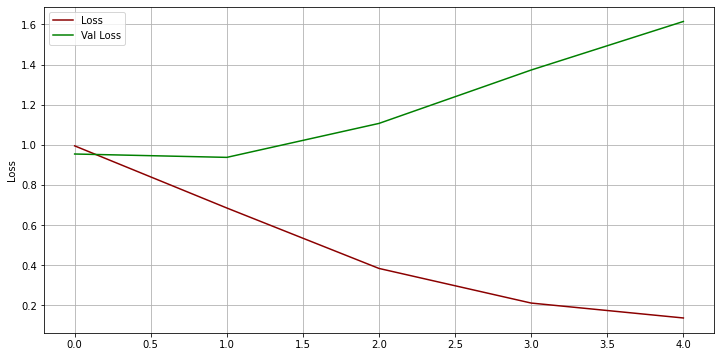

In [58]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

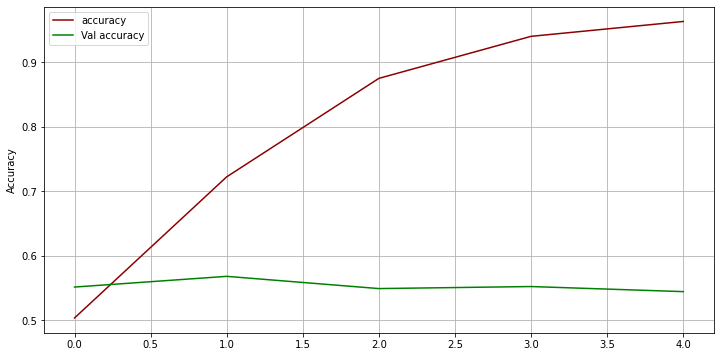

In [59]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [60]:
vectorize_layer = TextVectorization(
 max_tokens=15000,
 output_mode='int',
 output_sequence_length=len(max(df_all['Tweet'])))

vocab = set_array(df_all['Tweet'])

vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())


15000

In [61]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)

In [63]:
X_train.shape

(8865,)

In [64]:
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.fit_transform(Y_test.reshape(-1,1))

In [65]:
fit = model.fit(X_train, y_one, epochs=5, validation_data=(X_test, y_one_))

Epoch 1/5
278/278 [==============================] - 47s 171ms/step - loss: 1.0670 - accuracy: 0.4500 - val_loss: 1.0100 - val_accuracy: 0.5121
Epoch 2/5
278/278 [==============================] - 52s 187ms/step - loss: 0.9404 - accuracy: 0.5625 - val_loss: 0.9920 - val_accuracy: 0.5232
Epoch 3/5
278/278 [==============================] - 52s 187ms/step - loss: 0.8084 - accuracy: 0.6567 - val_loss: 1.0228 - val_accuracy: 0.5326
Epoch 4/5
278/278 [==============================] - 52s 186ms/step - loss: 0.7072 - accuracy: 0.7191 - val_loss: 1.0589 - val_accuracy: 0.5421
Epoch 5/5
278/278 [==============================] - 52s 186ms/step - loss: 0.6170 - accuracy: 0.7676 - val_loss: 1.1469 - val_accuracy: 0.5239


In [70]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53      1278
           1       0.64      0.57      0.60      1413
           2       0.38      0.52      0.44      1109

    accuracy                           0.52      3800
   macro avg       0.54      0.52      0.52      3800
weighted avg       0.55      0.52      0.53      3800



In [71]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,mask_zero=True),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(20 , activation='relu', return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh', return_sequences=True),
    
    tf.keras.layers.LSTM(10 , activation='tanh'),
    
    tf.keras.layers.Dense(3, activation='softmax')
    
    ])


    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
90/90 [==============================] - 27s 302ms/step - loss: 1.0936 - accuracy: 0.3834 - val_loss: 1.0937 - val_accuracy: 0.4475
Epoch 2/5
90/90 [==============================] - 26s 284ms/step - loss: 1.0231 - accuracy: 0.5029 - val_loss: 1.0571 - val_accuracy: 0.5478
Epoch 3/5
90/90 [==============================] - 26s 286ms/step - loss: 0.9327 - accuracy: 0.5695 - val_loss: 1.0984 - val_accuracy: 0.5257
Epoch 4/5
90/90 [==============================] - 26s 288ms/step - loss: 0.8303 - accuracy: 0.6466 - val_loss: 1.1694 - val_accuracy: 0.4838
Epoch 5/5
90/90 [==============================] - 26s 288ms/step - loss: 0.7197 - accuracy: 0.7131 - val_loss: 1.2250 - val_accuracy: 0.4767
 
Iter:  2
 
Epoch 1/5
90/90 [==============================] - 36s 397ms/step - loss: 1.0894 - accuracy: 0.3867 - val_loss: 1.0843 - val_accuracy: 0.5462
Epoch 2/5
90/90 [==============================] - 31s 346ms/step - loss: 0.9978 - accuracy: 0.5240 - val_loss: 1.0509 - val

In [72]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.47671666741371155
 Fold: 1	 Ultimo valor acc: 0.507498025894165
 Fold: 2	 Ultimo valor acc: 0.5098658204078674
 Fold: 3	 Ultimo valor acc: 0.6164167523384094
 Fold: 4	 Ultimo valor acc: 0.3922652006149292
 Fold: 5	 Ultimo valor acc: 0.4676145315170288
 Fold: 6	 Ultimo valor acc: 0.48104265332221985
 Fold: 7	 Ultimo valor acc: 0.4794628620147705
 Fold: 8	 Ultimo valor acc: 0.40442338585853577
 Fold: 9	 Ultimo valor acc: 0.5023696422576904

 Média: 0.4837675541639328 	 Std: 0.058472960075604374


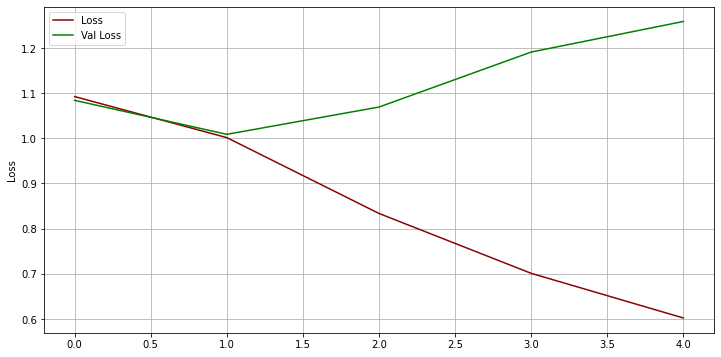

In [73]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

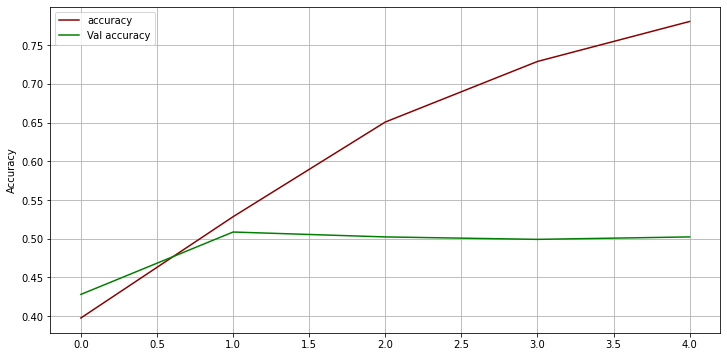

In [74]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## BDR

In [75]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.transform(Y_test.reshape(-1,1))

In [76]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=128 ,validation_data=(np.asarray(pre_X(X_test)), y_one_))

Epoch 1/10
70/70 [==============================] - 44s 628ms/step - loss: 1.0433 - accuracy: 0.4554 - val_loss: 0.9585 - val_accuracy: 0.5397
Epoch 2/10
70/70 [==============================] - 43s 620ms/step - loss: 0.8225 - accuracy: 0.6487 - val_loss: 0.9098 - val_accuracy: 0.6000
Epoch 3/10
70/70 [==============================] - 44s 634ms/step - loss: 0.5493 - accuracy: 0.7901 - val_loss: 0.9940 - val_accuracy: 0.5953
Epoch 4/10
70/70 [==============================] - 44s 634ms/step - loss: 0.3524 - accuracy: 0.8766 - val_loss: 1.1754 - val_accuracy: 0.5789
Epoch 5/10
70/70 [==============================] - 44s 635ms/step - loss: 0.2571 - accuracy: 0.9090 - val_loss: 1.3351 - val_accuracy: 0.5758
Epoch 6/10
70/70 [==============================] - 44s 635ms/step - loss: 0.2030 - accuracy: 0.9258 - val_loss: 1.5086 - val_accuracy: 0.5721
Epoch 7/10
70/70 [==============================] - 44s 636ms/step - loss: 0.1778 - accuracy: 0.9369 - val_loss: 1.5602 - val_accuracy: 0.5687

In [77]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60      1274
           1       0.62      0.59      0.61      1446
           2       0.47      0.44      0.46      1080

    accuracy                           0.56      3800
   macro avg       0.55      0.56      0.55      3800
weighted avg       0.56      0.56      0.56      3800



In [78]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
90/90 [==============================] - 53s 584ms/step - loss: 1.0314 - accuracy: 0.4779 - val_loss: 0.9949 - val_accuracy: 0.5422
Epoch 2/5
90/90 [==============================] - 50s 558ms/step - loss: 0.7988 - accuracy: 0.6515 - val_loss: 1.0149 - val_accuracy: 0.5201
Epoch 3/5
90/90 [==============================] - 52s 580ms/step - loss: 0.5472 - accuracy: 0.7925 - val_loss: 1.2356 - val_accuracy: 0.4317
Epoch 4/5
90/90 [==============================] - 51s 570ms/step - loss: 0.3785 - accuracy: 0.8604 - val_loss: 1.4580 - val_accuracy: 0.4396
Epoch 5/5
90/90 [==============================] - 52s 582ms/step - loss: 0.2842 - accuracy: 0.8954 - val_loss: 1.5712 - val_accuracy: 0.4625
 
Iter:  2
 
Epoch 1/5
90/90 [==============================] - 55s 616ms/step - loss: 1.0238 - accuracy: 0.4866 - val_loss: 0.9986 - val_accuracy: 0.5580
Epoch 2/5
90/90 [==============================] - 60s 668ms/step - loss: 0.7771 - accuracy: 0.6723 - val_loss: 0.9665 - val

In [79]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.4625098705291748
 Fold: 1	 Ultimo valor acc: 0.5777426958084106
 Fold: 2	 Ultimo valor acc: 0.5019731521606445
 Fold: 3	 Ultimo valor acc: 0.5745856165885925
 Fold: 4	 Ultimo valor acc: 0.44830307364463806
 Fold: 5	 Ultimo valor acc: 0.5221168994903564
 Fold: 6	 Ultimo valor acc: 0.5236966609954834
 Fold: 7	 Ultimo valor acc: 0.5308057069778442
 Fold: 8	 Ultimo valor acc: 0.5181674361228943
 Fold: 9	 Ultimo valor acc: 0.4589257538318634

 Média: 0.5118826866149903 	 Std: 0.04277120979666725


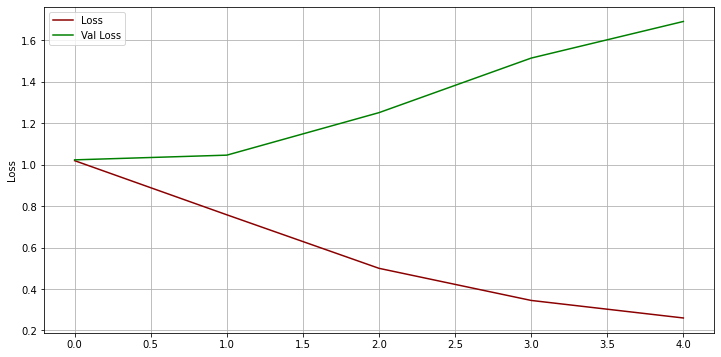

In [80]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

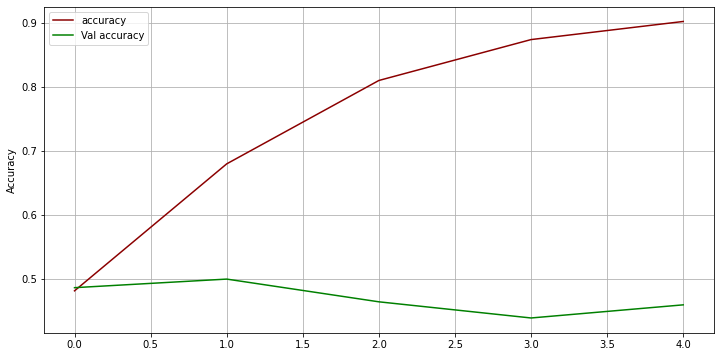

In [81]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## Conv 1D

In [82]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
])

model.compile(
    optimizer= tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
y_one = one.fit_transform(Y_train.reshape(-1,1))
y_one_ = one.transform(Y_test.reshape(-1,1))

In [83]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=15, batch_size=256 ,validation_data=(np.asarray(pre_X(X_test)), y_one_))

Epoch 1/15
35/35 [==============================] - 2s 65ms/step - loss: 1.0894 - accuracy: 0.3955 - val_loss: 1.0776 - val_accuracy: 0.3853
Epoch 2/15
35/35 [==============================] - 2s 64ms/step - loss: 1.0480 - accuracy: 0.4678 - val_loss: 1.0067 - val_accuracy: 0.5100
Epoch 3/15
35/35 [==============================] - 2s 66ms/step - loss: 0.9131 - accuracy: 0.5702 - val_loss: 0.9487 - val_accuracy: 0.5405
Epoch 4/15
35/35 [==============================] - 2s 66ms/step - loss: 0.7410 - accuracy: 0.6776 - val_loss: 0.9628 - val_accuracy: 0.5484
Epoch 5/15
35/35 [==============================] - 2s 63ms/step - loss: 0.5812 - accuracy: 0.7768 - val_loss: 1.0342 - val_accuracy: 0.5434
Epoch 6/15
35/35 [==============================] - 2s 61ms/step - loss: 0.4347 - accuracy: 0.8501 - val_loss: 1.1190 - val_accuracy: 0.5503
Epoch 7/15
35/35 [==============================] - 2s 62ms/step - loss: 0.3271 - accuracy: 0.8882 - val_loss: 1.2483 - val_accuracy: 0.5437
Epoch 8/15
35

In [84]:
predicted = model.predict(X_test)

print(classification_report(np.argmax(y_one_, axis=1), np.argmax(predicted, axis=1)))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57      1262
           1       0.59      0.61      0.60      1440
           2       0.44      0.47      0.46      1098

    accuracy                           0.55      3800
   macro avg       0.54      0.54      0.54      3800
weighted avg       0.55      0.55      0.55      3800



In [85]:
kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = model.fit( X_train, y_train_one, epochs=5, batch_size=128 ,validation_data=(X_test, y_teste_one)) 
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))


Iter:  1
 
Epoch 1/5
90/90 [==============================] - 4s 39ms/step - loss: 1.0704 - accuracy: 0.4278 - val_loss: 0.9794 - val_accuracy: 0.5635
Epoch 2/5
90/90 [==============================] - 3s 36ms/step - loss: 0.9052 - accuracy: 0.5808 - val_loss: 1.0190 - val_accuracy: 0.5099
Epoch 3/5
90/90 [==============================] - 3s 36ms/step - loss: 0.6498 - accuracy: 0.7448 - val_loss: 1.1159 - val_accuracy: 0.4941
Epoch 4/5
90/90 [==============================] - 3s 37ms/step - loss: 0.4094 - accuracy: 0.8494 - val_loss: 1.3871 - val_accuracy: 0.4878
Epoch 5/5
90/90 [==============================] - 3s 36ms/step - loss: 0.2701 - accuracy: 0.9022 - val_loss: 1.4284 - val_accuracy: 0.5209
 
Iter:  2
 
Epoch 1/5
90/90 [==============================] - 3s 36ms/step - loss: 1.0560 - accuracy: 0.4401 - val_loss: 1.0525 - val_accuracy: 0.5335
Epoch 2/5
90/90 [==============================] - 3s 35ms/step - loss: 0.8838 - accuracy: 0.5824 - val_loss: 0.9714 - val_accuracy: 0.5

In [86]:
media_std(val_accuracy)

 Fold: 0	 Ultimo valor acc: 0.5209155678749084
 Fold: 1	 Ultimo valor acc: 0.5951065421104431
 Fold: 2	 Ultimo valor acc: 0.5106551051139832
 Fold: 3	 Ultimo valor acc: 0.6093133091926575
 Fold: 4	 Ultimo valor acc: 0.433307021856308
 Fold: 5	 Ultimo valor acc: 0.49605056643486023
 Fold: 6	 Ultimo valor acc: 0.5181674361228943
 Fold: 7	 Ultimo valor acc: 0.5094786882400513
 Fold: 8	 Ultimo valor acc: 0.465244859457016
 Fold: 9	 Ultimo valor acc: 0.47235387563705444

 Média: 0.5130592972040177 	 Std: 0.05166805041840878


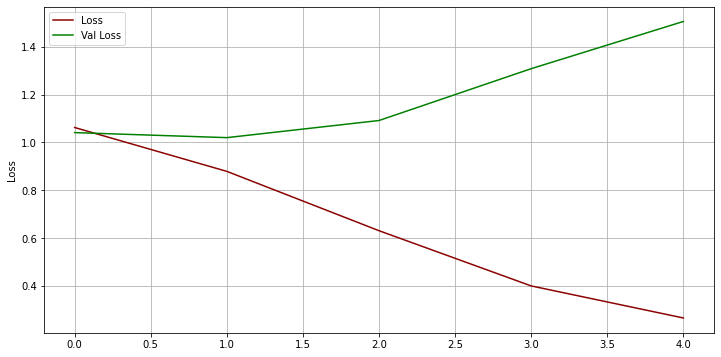

In [87]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

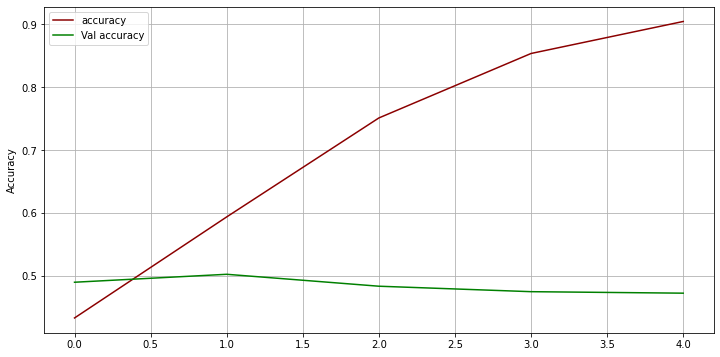

In [88]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

## AutoKeras

In [63]:
TextClassifier = ak.TextClassifier(
    num_classes=3, 
    multi_label=True, 
    loss=tf.keras.losses.categorical_crossentropy, 
    metrics=['accuracy'],
    project_name="text_classifier",
    max_trials=1,
    objective="val_loss"
)

# fit = TextClassifier.fit(
#     x=np.asarray(pre_X(X_train)), y=one.fit_transform(Y_train.reshape(-1,1)), epochs=10, validation_split=0.2, validation_data=(np.asarray(pre_X(X_test)),one.fit_transform(Y_test.reshape(-1,1)) )
# )

kf = KFold(n_splits=10)
val_accuracy = []
index = []
cont = 0

for train_index, test_index in kf.split(Tweet_preprocessed):
    cont += 1
    
    model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=64,
        mask_zero=True),
    
    tf.keras.layers.Conv1D(24,6, activation='relu'),
    tf.keras.layers.MaxPooling1D(2),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')   
    
    ])

    model.compile(
        optimizer= tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.categorical_crossentropy,
        metrics=['accuracy']
    )
    
    Tweet_preprocessed = np.asarray(pre_X(Tweet_preprocessed))
    
    X_train, X_test = Tweet_preprocessed[train_index], Tweet_preprocessed[test_index]
    y_train, y_test = polarity[train_index], polarity[test_index]
    y_train_one = one.fit_transform(y_train.reshape(-1,1))
    y_teste_one = one.fit_transform(y_test.reshape(-1,1))
    
    print("Iter: ",cont)
    print(" ")
    
    fit = TextClassifier.fit(
    x= X_train, y=y_train_one, epochs=5, validation_split=0.2, validation_data=(X_test, y_teste_one )
    )
    
    print(" ")
    val_accuracy.append(fit.history['val_accuracy'])
    
    index.append((train_index,test_index))

INFO:tensorflow:Reloading Oracle from existing project .\text_classifier\oracle.json
INFO:tensorflow:Reloading Tuner from .\text_classifier\tuner0.json
Iter:  1
 
INFO:tensorflow:Oracle triggered exit
Epoch 1/5
357/357 [==============================] - 56s 158ms/step - loss: 0.6022 - accuracy: 0.4936 - val_loss: 0.5733 - val_accuracy: 0.6440
Epoch 2/5
357/357 [==============================] - 58s 162ms/step - loss: 0.5144 - accuracy: 0.6151 - val_loss: 0.5251 - val_accuracy: 0.6109
Epoch 3/5
357/357 [==============================] - 59s 165ms/step - loss: 0.3968 - accuracy: 0.7347 - val_loss: 0.5824 - val_accuracy: 0.5722
Epoch 4/5
357/357 [==============================] - 57s 160ms/step - loss: 0.3109 - accuracy: 0.8081 - val_loss: 0.6632 - val_accuracy: 0.5667
Epoch 5/5
357/357 [==============================] - 59s 166ms/step - loss: 0.2403 - accuracy: 0.8579 - val_loss: 0.7955 - val_accuracy: 0.5509
Instructions for updating:
This property should not be used in TensorFlow 2.0, 

AttributeError: 'NoneType' object has no attribute 'history'

In [ ]:
media_std(val_accuracy)